In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##PART -A

In [63]:
STUDENT_ID = "PES2UG23CS349"

# AUTOMATIC ASSIGNMENT BASED ON SRN - DO NOT MODIFY

In [64]:
def get_student_assignment(student_id):
    """
    Generate unique polynomial TYPE and architecture based on student ID
    Uses last 3 digits of student ID for assignment
    """

    last_three = int(student_id[-3:])

    poly_type = last_three % 5

    np.random.seed(last_three)

    if poly_type == 0:
        degree = 2
        a = 0
        b = np.random.uniform(0.8, 1.5)
        c = np.random.uniform(3.0, 8.0)
        d = np.random.uniform(5.0, 15.0)
        poly_desc = f"QUADRATIC: y = {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 1:
        degree = 3
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.2, 0.2)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        poly_desc = f"CUBIC: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f}"

    elif poly_type == 2:
        degree = 4
        a = np.random.uniform(0.008, 0.02)
        b = np.random.uniform(1.5, 2.2)
        c = np.random.uniform(-1.0, 0.5)
        d = np.random.uniform(2.0, 5.0)
        e = np.random.uniform(8.0, 12.0)
        poly_desc = f"QUARTIC: y = {a:.4f}x⁴ + {b:.2f}x³ + {c:.2f}x² + {d:.2f}x + {e:.2f}"
        coefficients = (a, b, c, d, e)

    elif poly_type == 3:
        degree = "sine"
        a = np.random.uniform(1.5, 2.8)
        b = np.random.uniform(-0.8, 0.8)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        freq = np.random.uniform(0.02, 0.05)
        amp = np.random.uniform(5.0, 15.0)
        poly_desc = f"CUBIC + SINE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {amp:.1f}*sin({freq:.3f}x)"
        coefficients = (a, b, c, d, freq, amp)

    else:
        degree = "inverse"
        a = np.random.uniform(1.8, 2.5)
        b = np.random.uniform(-1.0, 0.5)
        c = np.random.uniform(3.0, 6.0)
        d = np.random.uniform(8.0, 12.0)
        inv_coeff = np.random.uniform(50, 200)
        poly_desc = f"CUBIC + INVERSE: y = {a:.2f}x³ + {b:.2f}x² + {c:.2f}x + {d:.2f} + {inv_coeff:.1f}/x"
        coefficients = (a, b, c, d, inv_coeff)


    if poly_type in [0, 1]:
        coefficients = (a, b, c, d)


    noise_std = np.random.uniform(1.5, 2.5)


    arch_type = last_three % 4
    architectures = {
        0: {"hidden1": 64, "hidden2": 64, "lr": 0.001, "batch_desc": "Balanced Architecture"},
        1: {"hidden1": 32, "hidden2": 72, "lr": 0.005, "batch_desc": "Narrow-to-Wide Architecture"},
        2: {"hidden1": 72, "hidden2": 32, "lr": 0.001, "batch_desc": "Wide-to-Narrow Architecture"},
        3: {"hidden1": 96, "hidden2": 96, "lr": 0.003, "batch_desc": "Large Balanced Architecture"}
    }

    return {
        "polynomial_type": poly_type,
        "degree": degree,
        "coefficients": coefficients,
        "polynomial_desc": poly_desc,
        "noise_std": noise_std,
        "architecture": architectures[arch_type],
        "student_seed": last_three
    }

# Get your assignment
assignment = get_student_assignment(STUDENT_ID)
poly_type = assignment["polynomial_type"]
degree = assignment["degree"]
coefficients = assignment["coefficients"]
noise_std = assignment["noise_std"]
hidden1 = assignment["architecture"]["hidden1"]
hidden2 = assignment["architecture"]["hidden2"]
learning_rate = assignment["architecture"]["lr"]


print("="*70)
print(f"ASSIGNMENT FOR STUDENT ID: {STUDENT_ID}")
print("="*70)
print(f"Polynomial Type: {assignment['polynomial_desc']}")
print(f"Noise Level: ε ~ N(0, {noise_std:.2f})")
print(f"Architecture: Input(1) → Hidden({hidden1}) → Hidden({hidden2}) → Output(1)")
print(f"Learning Rate: {learning_rate}")
print(f"Architecture Type: {assignment['architecture']['batch_desc']}")
print("="*70)

ASSIGNMENT FOR STUDENT ID: PES2UG23CS349
Polynomial Type: CUBIC + INVERSE: y = 1.95x³ + 0.46x² + 4.43x + 8.94 + 187.3/x
Noise Level: ε ~ N(0, 1.80)
Architecture: Input(1) → Hidden(32) → Hidden(72) → Output(1)
Learning Rate: 0.01
Architecture Type: Narrow-to-Wide Architecture


# DATASET GENERATION - DO NOT MODIFY

In [65]:
np.random.seed(assignment["student_seed"])

n_samples = 100000
x = np.random.uniform(-100, 100, n_samples)


if poly_type == 0:
    _, b, c, d = coefficients
    y = b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 1:
    a, b, c, d = coefficients
    y = a * x**3 + b * x**2 + c * x + d + np.random.normal(0, noise_std, n_samples)

elif poly_type == 2:
    a, b, c, d, e = coefficients
    y = a * x**4 + b * x**3 + c * x**2 + d * x + e + np.random.normal(0, noise_std, n_samples)

elif poly_type == 3:
    a, b, c, d, freq, amp = coefficients
    y = a * x**3 + b * x**2 + c * x + d + amp * np.sin(freq * x) + np.random.normal(0, noise_std, n_samples)

else:
    a, b, c, d, inv_coeff = coefficients
    # Add small epsilon to avoid division by zero
    y = a * x**3 + b * x**2 + c * x + d + inv_coeff / (x + np.sign(x) * 0.1) + np.random.normal(0, noise_std, n_samples)


df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('student_polynomial_dataset.csv', index=False)
print(f"Dataset with {n_samples:,} samples generated and saved!")

X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)

print(f"Training samples: {len(X_train_scaled):,}")
print(f"Test samples: {len(X_test_scaled):,}")

Dataset with 100,000 samples generated and saved!
Training samples: 80,000
Test samples: 20,000


# ACTIVATION FUNCTIONS

In [66]:
def relu(z):
    """ReLU activation function: max(0, z)"""
    return np.maximum(0, z)

def relu_derivative(z):
    """Derivative of ReLU: 1 if z > 0, else 0"""
    return (z > 0).astype(float)

# LOSS FUNCTION

In [67]:
def mse_loss(y_true, y_pred):
    """Mean Squared Error loss function"""
    return np.mean((y_true - y_pred) ** 2)

# WEIGHT INITIALIZATION
## **Xavier (Glorot) Initialization**

When training neural networks, how we initialize weights matters.
- If weights are **too small** → activations and gradients vanish.
- If weights are **too large** → activations and gradients explode.

**Xavier initialization** (Glorot & Bengio, 2010) balances this by keeping the variance of activations roughly the same across all layers.

---

### Formula

Let:
- **fan_in** = number of input units to a layer
- **fan_out** = number of output units from a layer

The variance of weights is:

**Uniform distribution**: W ~ U(-√(6/(fan_in + fan_out)), √(6/(fan_in + fan_out)))

**Normal distribution**: W ~ N(0, √(2/(fan_in + fan_out)))

Biases are initialized to 0.

In [68]:
def xavier_initialization(input_dim, hidden1, hidden2, output_dim):
    """
    Xavier initialization: weights ~ N(0, sqrt(2/(fan_in + fan_out))
    Biases should be initialized to zeros

    Args:
        input_dim: Size of input layer (1)
        hidden1: Size of first hidden layer (32 for your assignment)
        hidden2: Size of second hidden layer (72 for your assignment)
        output_dim: Size of output layer (1)

    Returns:
        W1, b1, W2, b2, W3, b3: Initialized weights and biases
    """
    np.random.seed(assignment["student_seed"])

    # Calculate Xavier standard deviation for each layer
    # W1: input to first hidden layer
    xavier_std_1 = np.sqrt(2 / (input_dim + hidden1))
    W1 = np.random.normal(0, xavier_std_1, (input_dim, hidden1))
    b1 = np.zeros((1, hidden1))

    # W2: first hidden to second hidden layer
    xavier_std_2 = np.sqrt(2 / (hidden1 + hidden2))
    W2 = np.random.normal(0, xavier_std_2, (hidden1, hidden2))
    b2 = np.zeros((1, hidden2))

    # W3: second hidden to output layer
    xavier_std_3 = np.sqrt(2 / (hidden2 + output_dim))
    W3 = np.random.normal(0, xavier_std_3, (hidden2, output_dim))
    b3 = np.zeros((1, output_dim))

    return W1, b1, W2, b2, W3, b3

# FORWARD PROPAGATION

In [69]:
def forward_pass(X, W1, b1, W2, b2, W3, b3):
    """
    Perform forward pass through the network
    Input → Hidden1(ReLU) → Hidden2(ReLU) → Output(Linear)

    Your architecture: Input(1) → Hidden(32) → Hidden(72) → Output(1)

    Args:
        X: Input data (batch_size, 1)
        W1, b1: First layer weights and biases (1, 32)
        W2, b2: Second layer weights and biases (32, 72)
        W3, b3: Output layer weights and biases (72, 1)

    Returns:
        z1, a1, z2, a2, z3: Pre-activations and activations for each layer
    """

    # First hidden layer
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)  # Apply ReLU activation

    # Second hidden layer
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)  # Apply ReLU activation

    # Output layer (no activation - linear)
    z3 = np.dot(a2, W3) + b3

    return z1, a1, z2, a2, z3

# BACKWARD PROPAGATION

In [70]:
def backward_pass(X, Y_true, z1, a1, z2, a2, Y_pred, W2, W3):
    """
    Compute gradients using chain rule for your specific architecture:
    Input(1) → Hidden(32) → Hidden(72) → Output(1)

    dLoss/dW = dLoss/dY_pred * dY_pred/dz * dz/dW

    Args:
        X: Input data
        Y_true: True target values
        z1, a1, z2, a2: Forward pass intermediate values
        Y_pred: Network predictions (z3)
        W2, W3: Weights needed for gradient computation

    Returns:
        dW1, db1, dW2, db2, dW3, db3: Gradients for all parameters
    """

    m = len(X)  # Batch size

    # Output layer gradients
    # Start with derivative of MSE: d/dy_pred[1/2 * (y_true - y_pred)^2] = (y_pred - y_true)
    dY_pred = (Y_pred - Y_true) / m

    # Third layer (Output) gradients - From Hidden(72) to Output(1)
    dW3 = np.dot(a2.T, dY_pred)
    db3 = np.sum(dY_pred, axis=0, keepdims=True)

    # Second hidden layer gradients - From Hidden(32) to Hidden(72)
    da2 = np.dot(dY_pred, W3.T)
    dz2 = da2 * relu_derivative(z2)
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    # First hidden layer gradients - From Input(1) to Hidden(32)
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_derivative(z1)
    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

# TRAINING FUNCTION

In [71]:
def train_neural_network(X_train, Y_train, X_test, Y_test, epochs=200, patience=10):
    """
    Train neural network for CUBIC + INVERSE polynomial approximation
    Your specific assignment: y = 1.95x³ + 0.46x² + 4.43x + 8.94 + 187.3/x
    Architecture: Input(1) → Hidden(32) → Hidden(72) → Output(1)
    Learning Rate: 0.005

    Args:
        X_train, Y_train: Training data
        X_test, Y_test: Test data for validation
        epochs: Maximum number of training epochs
        patience: Early stopping patience

    Returns:
        best_weights: Best model weights
        train_losses: Training loss history
        test_losses: Test loss history
    """

    # Initialize weights using Xavier initialization
    W1, b1, W2, b2, W3, b3 = xavier_initialization(1, hidden1, hidden2, 1)

    best_test_loss = float('inf')
    best_weights = None
    patience_counter = 0

    train_losses = []
    test_losses = []

    print("Starting training for CUBIC + INVERSE polynomial...")
    print(f"Architecture: 1 → {hidden1} → {hidden2} → 1")
    print(f"Learning Rate: {learning_rate}")
    print(f"Max Epochs: {epochs}, Early Stopping Patience: {patience}")
    print("-" * 50)

    for epoch in range(epochs):

        # Forward pass
        z1, a1, z2, a2, Y_pred_train = forward_pass(X_train, W1, b1, W2, b2, W3, b3)

        # Compute training loss
        train_loss = mse_loss(Y_train, Y_pred_train)

        # Backward pass
        dW1, db1, dW2, db2, dW3, db3 = backward_pass(X_train, Y_train, z1, a1, z2, a2, Y_pred_train, W2, W3)

        # Update weights using gradient descent
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1
        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        W3 = W3 - learning_rate * dW3
        b3 = b3 - learning_rate * db3

        # Evaluate on test set
        _, _, _, _, Y_pred_test = forward_pass(X_test, W1, b1, W2, b2, W3, b3)
        test_loss = mse_loss(Y_test, Y_pred_test)

        # Store losses
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1:3d}: Train Loss: {train_loss:.6f}, Test Loss: {test_loss:.6f}")

        # Early stopping check
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_weights = (W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy())
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            print(f"Best test loss: {best_test_loss:.6f}")
            break

    return best_weights, train_losses, test_losses

# EXECUTE TRAINING

In [58]:
print("Training Neural Network for CUBIC + INVERSE polynomial...")
print(f"Target function: y = 1.95x³ + 0.46x² + 4.43x + 8.94 + 187.3/x")
print(f"Using Narrow-to-Wide Architecture: 1 → 32 → 72 → 1")
print(f"Learning Rate: 0.005")
print("\nStarting training...\n")

weights, train_losses, test_losses = train_neural_network(
    X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled,
    epochs=500, patience=10
)


Training Neural Network for CUBIC + INVERSE polynomial...
Target function: y = 1.95x³ + 0.46x² + 4.43x + 8.94 + 187.3/x
Using Narrow-to-Wide Architecture: 1 → 32 → 72 → 1
Learning Rate: 0.005

Starting training...

Starting training for CUBIC + INVERSE polynomial...
Architecture: 1 → 32 → 72 → 1
Learning Rate: 0.01
Max Epochs: 500, Early Stopping Patience: 15
--------------------------------------------------
Epoch  20: Train Loss: 0.818604, Test Loss: 0.805576
Epoch  40: Train Loss: 0.637530, Test Loss: 0.628299
Epoch  60: Train Loss: 0.506474, Test Loss: 0.499896
Epoch  80: Train Loss: 0.408895, Test Loss: 0.403421
Epoch 100: Train Loss: 0.335900, Test Loss: 0.331956
Epoch 120: Train Loss: 0.286170, Test Loss: 0.283159
Epoch 140: Train Loss: 0.253374, Test Loss: 0.251016
Epoch 160: Train Loss: 0.232319, Test Loss: 0.230372
Epoch 180: Train Loss: 0.218577, Test Loss: 0.216870
Epoch 200: Train Loss: 0.209163, Test Loss: 0.207594
Epoch 220: Train Loss: 0.202168, Test Loss: 0.200672
Epoc

# RESULTS VISUALIZATION

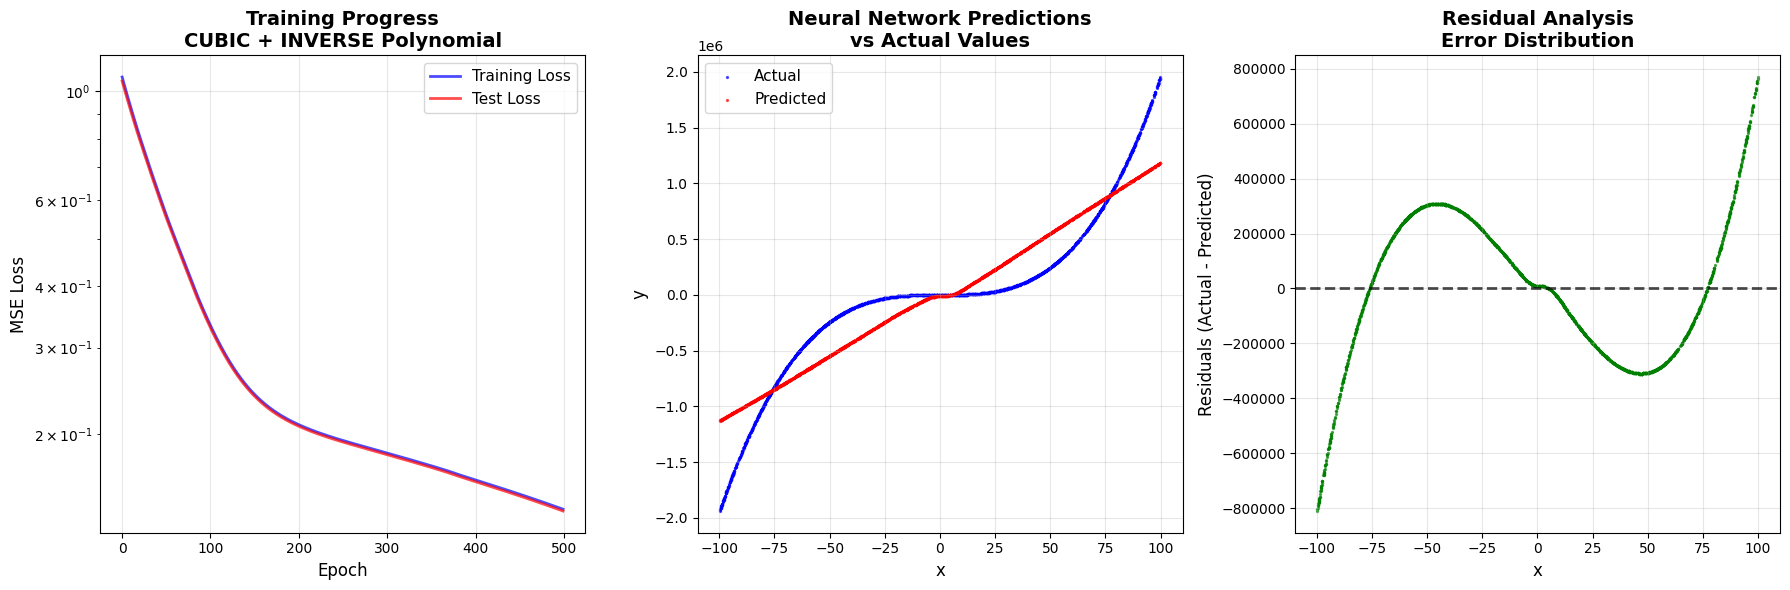

In [59]:
# Plot training progress
plt.figure(figsize=(18, 6))

# Loss curves
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss', color='blue', alpha=0.7, linewidth=2)
plt.plot(test_losses, label='Test Loss', color='red', alpha=0.7, linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE Loss', fontsize=12)
plt.title('Training Progress\nCUBIC + INVERSE Polynomial', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale for better visualization

# Get final predictions for visualization
W1, b1, W2, b2, W3, b3 = weights

# Make predictions on test set
_, _, _, _, Y_pred_scaled = forward_pass(X_test_scaled, W1, b1, W2, b2, W3, b3)

# Inverse transform to original scale
Y_test_orig = scaler_Y.inverse_transform(Y_test_scaled)
Y_pred_orig = scaler_Y.inverse_transform(Y_pred_scaled)
X_test_orig = scaler_X.inverse_transform(X_test_scaled)

# Predictions vs Actual (sample for better visualization)
sample_indices = np.random.choice(len(X_test_orig), 2000, replace=False)
X_sample = X_test_orig[sample_indices]
Y_sample_actual = Y_test_orig[sample_indices]
Y_sample_pred = Y_pred_orig[sample_indices]

plt.subplot(1, 3, 2)
plt.scatter(X_sample, Y_sample_actual, s=2, alpha=0.6, label='Actual', color='blue')
plt.scatter(X_sample, Y_sample_pred, s=2, alpha=0.6, label='Predicted', color='red')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Neural Network Predictions\nvs Actual Values', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Residual plot
plt.subplot(1, 3, 3)
residuals = Y_sample_actual.flatten() - Y_sample_pred.flatten()
plt.scatter(X_sample, residuals, s=2, alpha=0.6, color='green')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7, linewidth=2)
plt.xlabel('x', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title('Residual Analysis\nError Distribution', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# SPECIFIC PREDICTION TEST - x = 90.2

In [60]:
# Test prediction for x = 90.2
x_test_value = 90.2
x_new = np.array([[x_test_value]])
x_new_scaled = scaler_X.transform(x_new)

# Make prediction
_, _, _, _, y_pred_scaled = forward_pass(x_new_scaled, W1, b1, W2, b2, W3, b3)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)

# Calculate ground truth for CUBIC + INVERSE: y = 1.95x³ + 0.46x² + 4.43x + 8.94 + 187.3/x
a, b, c, d, inv_coeff = coefficients  # For your assignment: a=1.95, b=0.46, c=4.43, d=8.94, inv_coeff=187.3
y_true = a * x_test_value**3 + b * x_test_value**2 + c * x_test_value + d + inv_coeff / (x_test_value + np.sign(x_test_value) * 0.1)

print("\n" + "="*70)
print("PREDICTION RESULTS FOR x = 90.2")
print("CUBIC + INVERSE: y = 1.95x³ + 0.46x² + 4.43x + 8.94 + 187.3/x")
print("="*70)
print(f"Neural Network Prediction: {y_pred[0][0]:,.2f}")
print(f"Ground Truth (formula): {y_true:,.2f}")
print(f"Absolute Error: {abs(y_pred[0][0] - y_true):,.2f}")
print(f"Relative Error: {abs(y_pred[0][0] - y_true)/abs(y_true)*100:.3f}%")
print("="*70)


PREDICTION RESULTS FOR x = 90.2
CUBIC + INVERSE: y = 1.95x³ + 0.46x² + 4.43x + 8.94 + 187.3/x
Neural Network Prediction: 1,060,588.20
Ground Truth (formula): 1,435,049.67
Absolute Error: 374,461.47
Relative Error: 26.094%


# FINAL PERFORMANCE METRICS

In [72]:
# Calculate final performance metrics
final_train_loss = train_losses[-1] if train_losses else float('inf')
final_test_loss = test_losses[-1] if test_losses else float('inf')

# Calculate R² score
y_test_mean = np.mean(Y_test_orig)
ss_res = np.sum((Y_test_orig - Y_pred_orig) ** 2)
ss_tot = np.sum((Y_test_orig - y_test_mean) ** 2)
r2_score = 1 - (ss_res / ss_tot)

# Calculate Mean Absolute Error
mae = np.mean(np.abs(Y_test_orig - Y_pred_orig))

# Calculate Root Mean Squared Error
rmse = np.sqrt(np.mean((Y_test_orig - Y_pred_orig) ** 2))

print("\n" + "="*70)
print("FINAL PERFORMANCE SUMMARY")
print("CUBIC + INVERSE Polynomial Approximation")
print("Architecture: 1 → 32 → 72 → 1 (Narrow-to-Wide)")
print("Learning Rate: 0.01")
print("="*70)
print(f"Final Training Loss (MSE): {final_train_loss:.6f}")
print(f"Final Test Loss (MSE): {final_test_loss:.6f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score (Coefficient of Determination): {r2_score:.4f}")
print(f"Total Epochs Completed: {len(train_losses)}")
print("\nModel Performance:")
if r2_score > 0.95:
    print("🟢 EXCELLENT - Model captures the polynomial very well!")
elif r2_score > 0.85:
    print("🟡 GOOD - Model performs well with minor deviations")
else:
    print("🔴 NEEDS IMPROVEMENT - Consider more epochs or architecture changes")
print("="*70)


FINAL PERFORMANCE SUMMARY
CUBIC + INVERSE Polynomial Approximation
Architecture: 1 → 32 → 72 → 1 (Narrow-to-Wide)
Learning Rate: 0.01
Final Training Loss (MSE): 0.140327
Final Test Loss (MSE): 0.139126
Root Mean Squared Error: 275388.75
Mean Absolute Error: 225024.07
R² Score (Coefficient of Determination): 0.8604
Total Epochs Completed: 500

Model Performance:
🟡 GOOD - Model performs well with minor deviations
